# Perfilagem geofísica de poços

A atividade da perfilagem geofísica de poços consiste em realizar uma série de medidas relacionadas às propriedades físicas das rochas, tais como raios gama, resistividade, vagarosidade, densidade, porosidade etc, ao longo de um poço perfurado (ou em perfuração).

Os principais objetivos da perfilagem são:

* **Avaliação de formações**: determinar litologia e estimar propriedades indiretas, tais como: porosidade, permeabilidae, saturação de fluidos (água, óleo e gás) e pressão;
* **Cálculo de netpay**: identificar zonas que tem potencial para acumulo de hidrocarbonetos;
* **Amarração sísmica poço**: integração entre os dados de sísmica e poços de poços (vagarosidade e densidade);
* **Caracterização e monitoramento dos reservatórios**: compreensão da geometria e distribuição das propriedades ao longo do reservatório, bem como o entendimento da variação das suas propriedades ao longo da explotação de hidrocarbonetos

![Seção esquemática de uma perfilagem](https://www.researchgate.net/publication/367157378/figure/fig5/AS:11431281113205429@1673772449160/Wireline-logging-tools-a-depicts-elements-of-logging-tool-viz-measurement-sonde.png "Perfilagem geofísica de poços")

## Tipos de arquivo

Os perfis geofísicos podem ser apresentados em dois principais tipos de arquivos: **.LAS** (Log ASCII Standard) e **.DLIS** (Digital Log Interchange Standard).

#### **.las** (Log ASCII Standard)

É um formato do tipo acesso direto amplamente utilizado na indústria de óleo e gás, e também é o principal formato de carregamento em softwares de interpretação sísmica e de poço.

Sua estrura é composta por:

* Cabeçalho -  parte do dado que contém informações sobre o poço, logs presentes, unidades de medida, propriedades da lama etc;
* Logs - medidas quantitativas e qualitativas das propriedades físicas medidas.

#### **.dlis** (Logging Industry Data Standard - LIDS)

É um tipo de arquivo que armazena os logs de poços em diferentes arquivos binários e estes são referenciados através do seus registro lógico no arquivo dlis. É um arquivo de estrutura mais complexa, que é capaz de não apenas armazenar os dados de medições de propriedades petrofísicas, mas também é capaz de armazenar:

* Header das medições;
* Testes de formação;
* Dados de pressão e temperatura;
* Análises de amostras de rochas a nível laboratórial; e
* Registros de testemunhos: descrição e análise de tesmunhos.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import os 

In [53]:
#Função para adicionar os valores da formação
#Consultar a perfil composto
def add_formation(DEPT):
    form_array = []
    for i in np.arange(len(DEPT)):
        if DEPT[i]>=524 and DEPT[i]<2134:
            form_array.append("Marambaia")
        if DEPT[i]>=2134 and DEPT[i]<3988:
            form_array.append("Jureia")
        if DEPT[i]>=3988:
            form_array.append('Itajai-Açu e Ilha Bela')
    return form_array

In [54]:
#Apontando o diretório onde estão os dados
data_dir = '../Dados/Poço/well_logs/las'
data_dir

'../Dados/Poço/well_logs/las'

In [55]:
os.listdir(data_dir)

['GEOLOAD_1.las',
 'GEOLOAD_2.las',
 'LIS1_001.las',
 'LIS2_002.las',
 'LIS_001.las',
 'LIS_002.las',
 'LIS_003.las',
 'LIS_004.las',
 'LIS_005.las',
 'LIS_006.las',
 'LIS_007.las',
 'LIS_008.las',
 'LIS_009.las',
 'LIS_010.las',
 'LIS_011.las',
 'LIS_012.las',
 'LIS_013.las']

In [56]:
well = lasio.read(data_dir+'/LIS_002.las')
well

Only engine='normal' can read wrapped files


In [57]:
#Verificando os parâmetros do poço
well.header.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [58]:
#Informações do header
well.header['Well']

[HeaderItem(mnemonic="STRT", unit="M", value="5244.5412", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="M", value="5059.0704", descr="STOP DEPTH"),
 HeaderItem(mnemonic="STEP", unit="M", value="-0.1524", descr="STEP"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="PETROBRAS S.A.", descr="COMPANY"),
 HeaderItem(mnemonic="WELL", unit="", value="3-BRSA-293D-SPS", descr="WELL"),
 HeaderItem(mnemonic="FLD", unit="", value="BS-400", descr="FIELD"),
 HeaderItem(mnemonic="LOC", unit="", value="BASE SAD 69:", descr="LOCATION"),
 HeaderItem(mnemonic="CNTY", unit="", value="SANTOS", descr="COUNTY"),
 HeaderItem(mnemonic="STAT", unit="", value="BRASIL", descr="STATE"),
 HeaderItem(mnemonic="CTRY", unit="", value="BRASIL", descr="COUNTRY"),
 HeaderItem(mnemonic="API", unit="", value="", descr="API NUMBER"),
 HeaderItem(mnemonic="UWI", unit="", value="", descr="UNIQUE WELL ID"),
 HeaderItem(mnemonic="DATE", unit=""

In [59]:
well.header['Curves']

[CurveItem(mnemonic="DEPT:1", unit="M", value="", descr="DEPTH (BOREHOLE) {F10.4}", original_mnemonic="DEPT", data.shape=(1218,)),
 CurveItem(mnemonic="DEPT:2", unit="M", value="", descr="{F13.4}", original_mnemonic="DEPT", data.shape=(1218,)),
 CurveItem(mnemonic="ARAT", unit="", value="", descr="{F13.4}", original_mnemonic="ARAT", data.shape=(1218,)),
 CurveItem(mnemonic="BIT", unit="IN", value="", descr="{F13.4}", original_mnemonic="BIT", data.shape=(1218,)),
 CurveItem(mnemonic="DZ3X", unit="DEG", value="", descr="{F13.4}", original_mnemonic="DZ3X", data.shape=(1218,)),
 CurveItem(mnemonic="DEPM", unit="M", value="", descr="{F13.4}", original_mnemonic="DEPM", data.shape=(1218,)),
 CurveItem(mnemonic="DV3X", unit="DEG", value="", descr="{F13.4}", original_mnemonic="DV3X", data.shape=(1218,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="", descr="{F13.4}", original_mnemonic="GR", data.shape=(1218,)),
 CurveItem(mnemonic="GRSL", unit="GAPI", value="", descr="{F13.4}", original_mnemo

In [60]:
well.curves['M2R1']

CurveItem(mnemonic="M2R1", unit="OHMM", value="", descr="{F13.4}", original_mnemonic="M2R1", data.shape=(1218,))

In [61]:
well.curves['M2R1'].data

array([nan, nan, nan, ..., nan, nan, nan])

In [62]:
well.df() #Transformando para um objeto dataframe

,DEPT:2,ARAT,BIT,DZ3X,DEPM,DV3X,GR,GRSL,K,KAPI,...,ZZAI[0],ZZAO[0],ZZAR[0],ZZHI[0],C060[0],C061[0],ZZSC,ZZSR,ZZSO[0],C065[0]
DEPT:1,,,,,,,,,,,,,,,,,,,,,
5244.5412,5244.5412,NaN,8.5,NaN,5244.5412,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5244.3888,5244.3888,NaN,8.5,NaN,5244.3888,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5244.2364,5244.2364,NaN,8.5,NaN,5244.2364,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5244.0840,5244.0840,NaN,8.5,NaN,5244.0830,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5243.9316,5243.9316,NaN,8.5,NaN,5243.9307,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059.6800,5059.6800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5059.5276,5059.5276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5059.3752,5059.3752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
well.df().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 5244.5412 to 5059.0704
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPT:2   1218 non-null   float64
 1   ARAT     745 non-null    float64
 2   BIT      965 non-null    float64
 3   DZ3X     966 non-null    float64
 4   DEPM     965 non-null    float64
 5   DV3X     966 non-null    float64
 6   GR       961 non-null    float64
 7   GRSL     911 non-null    float64
 8   K        905 non-null    float64
 9   KAPI     905 non-null    float64
 10  KTH      905 non-null    float64
 11  M2R1     811 non-null    float64
 12  M2R2     811 non-null    float64
 13  M2R3     811 non-null    float64
 14  M2R6     811 non-null    float64
 15  M2R9     811 non-null    float64
 16  M2RX     811 non-null    float64
 17  RESH     745 non-null    float64
 18  RESV     745 non-null    float64
 19  RTHK     905 non-null    float64
 20  RTHU     905 non-null    float64
 21  RUK   

In [64]:
#Vamos criar um dicionário com todos os las e seus respectivos headers
well_dict = {} #Dicionário vazio

for i in os.listdir(data_dir): #loop no diretório com os las
    try:
        well_temp = lasio.read(data_dir+'/'+i) #lendo o poço i
        #Carregando o header e o dataframe em no dicionário
        well_dict[i[:-4]] = {'df':well_temp.df(),
                             'header':well_temp.header}
    except:
        pass
    
del(well_temp)

Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files


In [65]:
well_dict

{'GEOLOAD_1': {'df':                 TDEP  MFFITA   MPERM  MPHITA  MSIGTA  T2DIST[0]  T2PTOT  \
  DEPT                                                                      
  5282.9460  5282.9460     NaN     NaN     NaN     NaN        NaN     NaN   
  5282.7936  5282.7936     NaN     NaN     NaN     NaN        NaN     NaN   
  5282.6412  5282.6412     NaN     NaN     NaN     NaN        NaN     NaN   
  5282.4888  5282.4888     NaN     NaN     NaN     NaN        NaN     NaN   
  5282.3364  5282.3364     NaN     NaN     NaN     NaN        NaN     NaN   
  ...              ...     ...     ...     ...     ...        ...     ...   
  4998.7200  4998.7200  0.8485  0.0065  2.6039  8.5362     0.9454  8.5362   
  4998.5676  4998.5676  0.9428  0.0079  2.3254  8.3225     0.7048  8.3225   
  4998.4152  4998.4152  1.2797  0.0145  2.1529  7.8407     0.4934  7.8407   
  4998.2628  4998.2628  1.5617  0.0216  2.1219  7.4345     0.5072  7.4345   
  4998.1104  4998.1104  1.5874  0.0204  2.1419  6.9410   

In [66]:
las = list(well_dict.keys())

#Criando um único conjunto de dados
df = well_dict[las[0]]['df']
df['log'] = las[0]

for i in las[1:]:
    aux = well_dict[i]['df']
    aux['log'] = i
    #Adicionando informações do poço no dataframe de referência
    df = df.combine_first(aux)
del(aux)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9675 entries, 3827.6784 to 5301.996
Columns: 106 entries, ARAT to log
dtypes: float64(105), object(1)
memory usage: 7.9+ MB


In [68]:
df.head()

,ARAT,BIT,C034[0],C035[0],C038[0],C052[0],C055[0],C060[0],C061[0],C065[0],...,ZCOR,ZDEN,ZZAI[0],ZZAO[0],ZZAR[0],ZZHI[0],ZZSC,ZZSO[0],ZZSR,log
3827.6784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3827.8308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3827.9832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3828.1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3828.2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003


#### Consulta a mnemonicos

https://www.geologic.com/gDCcloud/help/codes-abbreviations/codes-las-mnemonics.htm

In [69]:
#Buscando por perfis de gr
for j in las:
    for i in well_dict[j]['header']['Curves']:
        if 'API' in i['unit']: #Colocar unidade do mnemonico
            print(j,i['mnemonic'])

LIS1_001 GR
LIS2_002 GR
LIS_002 GR
LIS_002 GRSL
LIS_002 KAPI
LIS_002 KTH
LIS_002 TAPI
LIS_002 UAPI
LIS_004 GR
LIS_004 GRSL
LIS_004 KAPI
LIS_004 KTH
LIS_004 TAPI
LIS_004 UAPI
LIS_005 GR
LIS_007 GR
LIS_009 GR
LIS_011 GR
LIS_012 GR
LIS_013 GR


In [70]:
#Buscando por perfis de resistividade
for j in las:
    for i in well_dict[j]['header']['Curves']:
        if 'OHM' in i['unit']:
            print(j,i['mnemonic'])

LIS_002 M2R1
LIS_002 M2R2
LIS_002 M2R3
LIS_002 M2R6
LIS_002 M2R9
LIS_002 M2RX
LIS_002 RESH
LIS_002 RESV
LIS_002 ZZSR
LIS_004 M2R1
LIS_004 M2R2
LIS_004 M2R3
LIS_004 M2R6
LIS_004 M2R9
LIS_004 M2RX
LIS_004 RESH
LIS_004 RESV
LIS_004 ZZSR
LIS_009 M2R1
LIS_009 M2R2
LIS_009 M2R3
LIS_009 M2R6
LIS_009 M2R9
LIS_009 M2RX
LIS_011 M2R1
LIS_011 M2R2
LIS_011 M2R3
LIS_011 M2R6
LIS_011 M2R9
LIS_011 M2RX


In [71]:
#Selecionando os perfis que serão utilizados para compor o conjunto de dados
cols = ['GR','M2R1','M2R2','M2R3','M2R6','M2R9','DT','ZDEN','ZCOR','CNC','log']

df = df[cols]
df.head()

,GR,M2R1,M2R2,M2R3,M2R6,M2R9,DT,ZDEN,ZCOR,CNC,log
3827.6784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3827.8308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3827.9832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3828.1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003
3828.2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003


In [72]:
df.index

Index([3827.6784, 3827.8308, 3827.9832, 3828.1356,  3828.288, 3828.4404,
       3828.5928, 3828.7452, 3828.8976,   3829.05,
       ...
       5300.6244, 5300.7768, 5300.9292, 5301.0816,  5301.234, 5301.3864,
       5301.5388, 5301.6912, 5301.8436,  5301.996],
      dtype='float64', length=9675)

In [73]:
#Adicionando a formação geológica
df['Formação'] = add_formation(df.index)
df.head()

,GR,M2R1,M2R2,M2R3,M2R6,M2R9,DT,ZDEN,ZCOR,CNC,log,Formação
3827.6784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3827.8308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3827.9832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3828.1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3828.2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia


In [74]:
print(df.index.min(),df.index.max())

3827.6784 5301.996


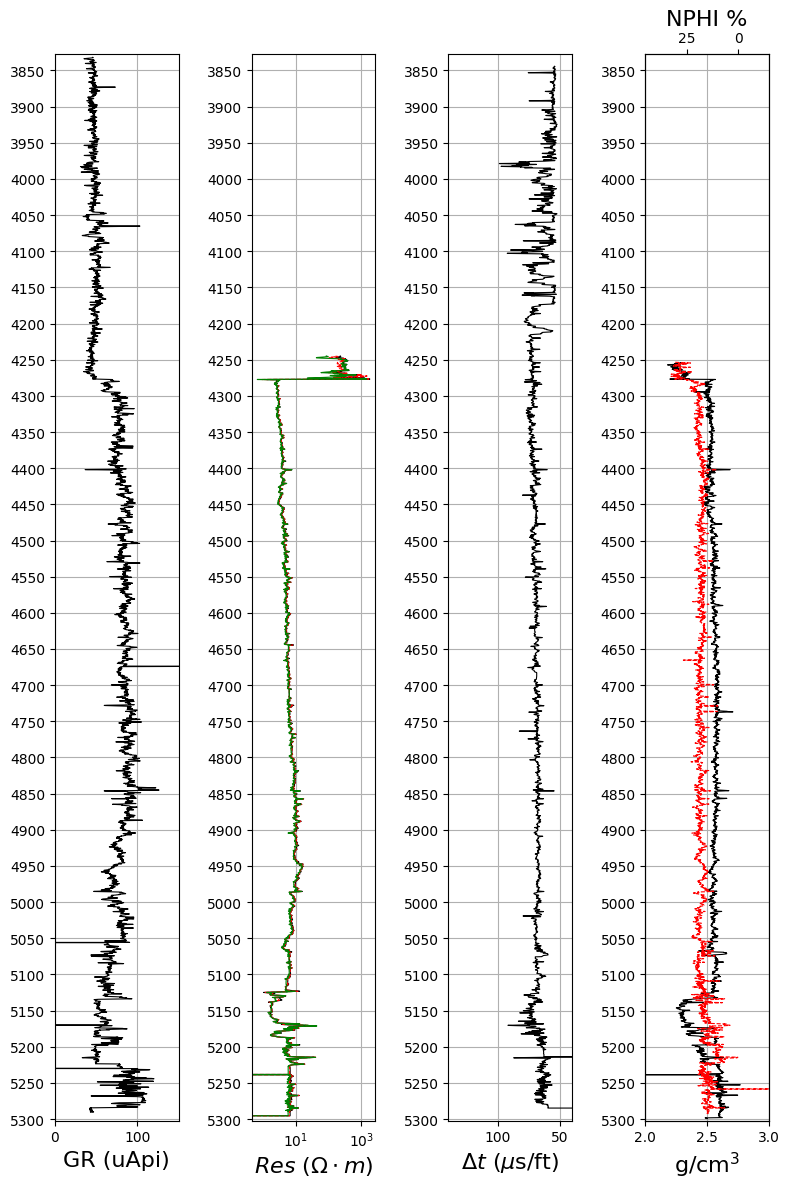

In [75]:
fig,axes = plt.subplots(ncols=4,figsize=(8,12))

for ax in axes:
    ax.set_yticks(np.arange(3800,5350,50))
    ax.invert_yaxis()
    ax.set_ylim(df.index.max(),df.index.min())
    ax.grid()

axes[0].plot(df.GR,df.index,lw=0.8,color='black')
axes[0].set_xlim(0,150)
axes[0].set_xlabel('GR (uApi)',fontsize=16)

axes[1].semilogx(df.M2R9,df.index,lw=0.8,color='black')
axes[1].semilogx(df.M2R6,df.index,color='red',lw=0.8,ls='--')
axes[1].semilogx(df.M2R3,df.index,color='green',lw=0.8)
axes[1].set_xlabel(r'$Res$ ($\Omega \cdot m$)',fontsize=16)

axes[2].plot(df.DT,df.index,lw=0.8,color='black')
axes[2].set_xlim(140,40)
axes[2].set_xlabel(r'$\Delta t$ ($\mu$s/ft)',fontsize=16)

axes[3].plot(df.ZDEN,df.index,lw=0.8,color='black')
axes[3].set_xlim(2,3)
axes[3].set_xlabel(r'g/cm$^3$',fontsize=16)

axes2 = axes[3].twiny()

axes2.plot(df.CNC,df.index,lw=0.8,color='red',ls='--')
axes2.set_xlabel('NPHI %',fontsize=16)
axes2.set_xlim(45,-15)

fig.tight_layout()

In [76]:
df.head()

,GR,M2R1,M2R2,M2R3,M2R6,M2R9,DT,ZDEN,ZCOR,CNC,log,Formação
3827.6784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3827.8308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3827.9832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3828.1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia
3828.2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIS_003,Jureia


In [77]:
df.to_csv('../Dados/well.csv')

## Perfis de resistividade

Os perfis de resistividade foram inicialmente desenvolvidos para pesquisa de hidrocarbonetos, apesar de hoje serem úteis na perfilagem de recursos hídricos, minerais ou elementos geotécnicos. A priori, utilizaremos os perfis de indução elétrica, cujo o princípio da ferramenta se dá através do eletromagnetismo, onde a ferramenta é composta por uma bobina emissora e receptora, onde uma corrente alternada de alta frequência induz uma corrente secundária na formação e está última é detectada por uma bobina receptora.

A priori, Enunciemos a equação de Archie:

$$S_w = \left( \frac{Rw}{R_t \phi^m} \right)^\frac{1}{n}$$

$S_w$ - Saturação de água, ou fração de água que preenche os poros;
$R_w$ - Resistividade do fluido de formação;
$R_t$ - Resistividade da formação (comumente medida pelo log de resistividade);
$\phi$ - Porosidade da formação;
$m$ - Coeficiente de cimentação, é um fator que reflete a disposição dos grãos da rocha e dos poros; e
$n$ - Expoente de saturação, que é dependente da forma como a água está preenchendo os poros.

Veja que essa equação tem uma relação direta com a medida da resistividade do meio e do fluido que o preenche. Entrentanto, é importante saber os perfis de resistividade podem ser divididos em perfis de investigação rasa, média e profunda.

![](https://geohazard009.files.wordpress.com/2015/02/borehole_env.jpg "Modelo esquemático do poço e formação usado para descrever as medidas de log de resistividade (Sclumberger)")

<img src="../Figs/Form_invasion.png" alt="Invasão do fluido" width="400"/>
